In [ ]:
from google.colab import drive
import zipfile
import pandas as pd

drive.mount('/content/drive')

chemin_zip = "/content/drive/My Drive/yvanolfotso/dataset/BenignAndMaliciousDataset.zip"

repertoire_temporaire = "/content/extraction_temp"

# Fonction pour extraire le fichier CSV de l'archive zip
def extraire_csv_de_zip(chemin_zip, repertoire_temporaire):
    with zipfile.ZipFile(chemin_zip, 'r') as zip_ref:
        zip_ref.extractall(repertoire_temporaire)  # Extraction dans mon répertoire temporaire

# Extraire le fichier CSV
extraire_csv_de_zip(chemin_zip, repertoire_temporaire)

# Chemin d'accès complet vers le fichier CSV extrait
chemin_csv = f"{repertoire_temporaire}/BenignAndMaliciousDataset.csv"

# Lire le fichier CSV en tant que DataFrame pandas
df = pd.read_csv(chemin_csv)

# Afficher les premières lignes du DataFrame pour vérification
print(df.head())
print(df.shape)


Feature: Domain Information Gain: 1.0
Feature: RegisteredCountry Information Gain: 0.9011609719127451
Feature: RegisteredOrg Information Gain: 0.8510558591480459
Feature: NumericSequence Information Gain: 0.777969675090183
Feature: DNSRecordType Information Gain: 0.75716331000429
Feature: NumericRatio Information Gain: 0.7510969566411618
Feature: Ip Information Gain: 0.749260387531234
Feature: ASN Information Gain: 0.6061739819993015
Feature: StrangeCharacters Information Gain: 0.5782910953568261
Feature: ConsoantRatio Information Gain: 0.5511353910657242


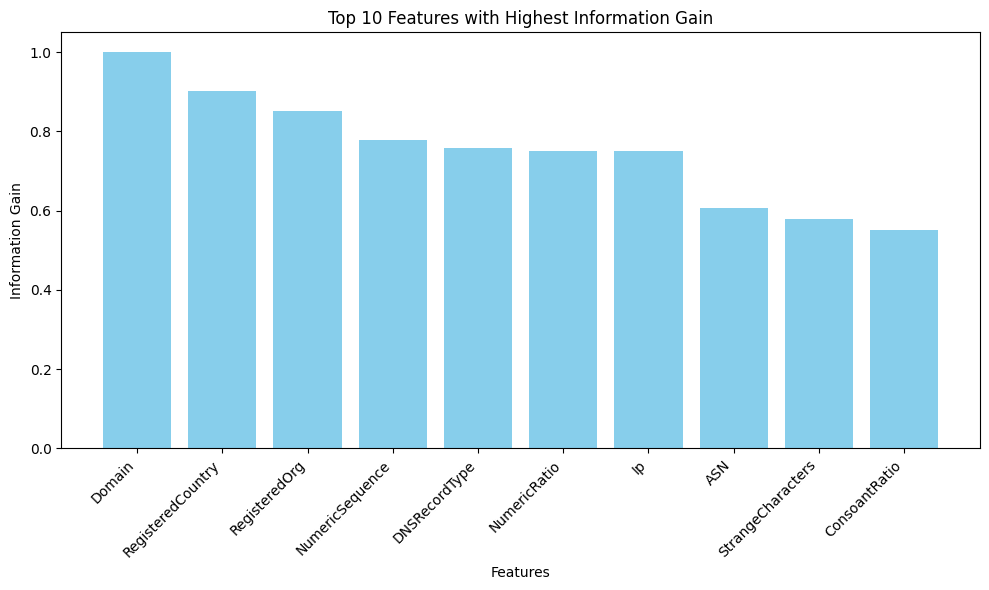

In [ ]:
import pandas as pd
from math import log
import matplotlib.pyplot as plt

def entropy(class_probabilities):
    """Calculates the entropy of a list of class probabilities."""
    return sum(-p * log(p, 2) for p in class_probabilities if p)

def information_gain(data, feature_name, classes):
    total_entropy = entropy(data['Class'].value_counts(normalize=True))
    values = data[feature_name].unique()
    weighted_entropy = 0.0

    for v in values:
        subset_length = len(data[data[feature_name] == v])
        if subset_length == 0:
            continue  # Skip this value if subset length is zero to avoid division by zero
        subset_entropy = entropy(data[data[feature_name] == v]['Class'].value_counts(normalize=True))
        weighted_entropy += (subset_length / len(data)) * subset_entropy

    return total_entropy - weighted_entropy

def calculate_information_gains(data, classes):
    information_gains = []
    total_entropy = entropy(data['Class'].value_counts(normalize=True))

    for feature_name in data.columns[:-1]:  # Exclude the last column which is the target variable
        gain = information_gain(data, feature_name, classes)
        information_gains.append((feature_name, gain))

    return information_gains

def select_top_features(data, classes, top_n=10):
    information_gains = calculate_information_gains(data, classes)
    top_features = sorted(information_gains, key=lambda x: x[1], reverse=True)[:top_n]
    return top_features

# data = pd.read_csv("../data/BenignAndMaliciousDataset.csv")

data = df
classes = data['Class'].unique()

# Calcul du gain d'information pour chaque caractéristique
# information_gains = calculate_information_gains(data, classes)

# Afficher les gains d'information pour chaque caractéristique
# for feature_name, gain in information_gains:
#     print("Information Gain for feature", feature_name, ":", gain)

# Sélectionner les 10 meilleures caractéristiques
top_features = select_top_features(data, classes, top_n=10)

# Afficher les noms des 10 meilleures caractéristiques et leur gain d'information
for feature_name, gain in top_features:
    print("Feature:", feature_name, "Information Gain:", gain)

# Tracer les 10 meilleures caractéristiques
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in top_features], [x[1] for x in top_features], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Top 10 Features with Highest Information Gain')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




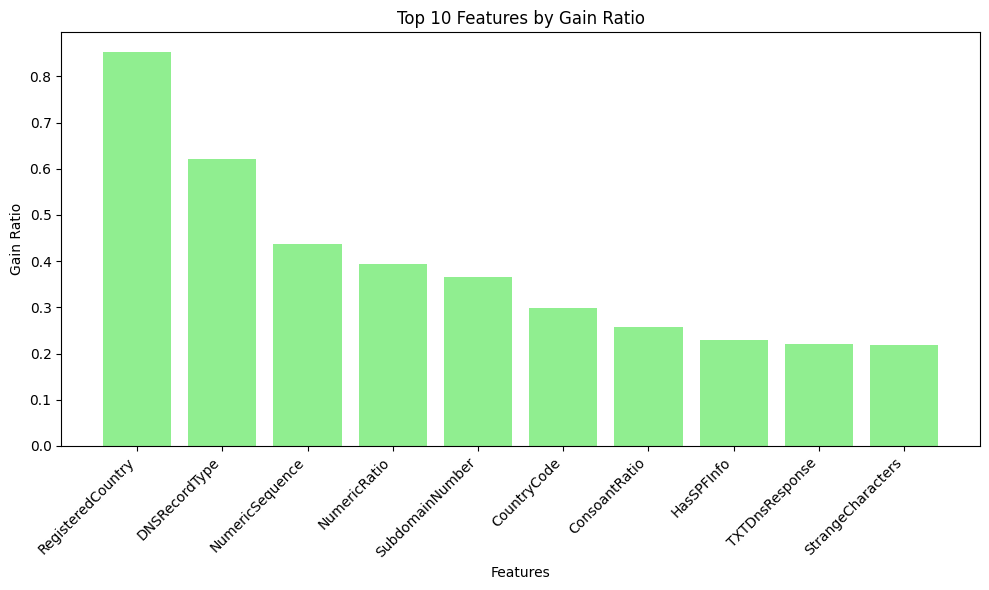

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log

def entropy(class_probabilities):
    """Calculates the entropy of a list of class probabilities."""
    return sum(-p * log(p, 2) for p in class_probabilities if p)

def information_gain(data, feature_name, classes):
    total_entropy = entropy([len(data[data['Class'] == c]) / len(data) for c in classes])
    values = data[feature_name].unique()
    weighted_entropy = 0.0

    for v in values:
        subset_length = len(data[data[feature_name] == v])
        if subset_length == 0:
            continue  # Skip this value if subset length is zero to avoid division by zero
        subset_entropy = entropy([len(data[(data[feature_name] == v) & (data['Class'] == c)]) / subset_length for c in classes])
        weighted_entropy += (subset_length / len(data)) * subset_entropy

    return total_entropy - weighted_entropy

def calculate_information_gains(data, classes):
    information_gains = []

    for feature_name in data.columns[:-1]:  # Exclude the last column which is the target variable
        gain = information_gain(data, feature_name, classes)
        information_gains.append((feature_name, gain))

    return information_gains

def gain_ratio(data, feature_name, classes):
    gain = information_gain(data, feature_name, classes)
    iv = intrinsic_value(data, feature_name)
    if iv == 0:  # Avoid division by zero
        return 0
    return gain / iv

def intrinsic_value(data, feature_name):
    values = data[feature_name].unique()
    iv = sum(-(len(data[data[feature_name] == v]) / len(data)) * log(len(data[data[feature_name] == v]) / len(data), 2) for v in values if len(data[data[feature_name] == v]) > 0)
    return iv

def select_top_features_with_gain_ratio(data, classes, top_n=10):
    gain_ratios = [(feature_name, gain_ratio(data, feature_name, classes)) for feature_name in data.columns[:-1]]
    top_features = sorted(gain_ratios, key=lambda x: x[1], reverse=True)[:top_n]
    return top_features

def plot_top_features_gain_ratio(top_features, feature_names):
    top_feature_names = [feature_name for feature_name, _ in top_features]
    top_feature_ratios = [ratio for _, ratio in top_features]

    plt.figure(figsize=(10, 6))
    plt.bar(top_feature_names, top_feature_ratios, color='lightgreen')
    plt.xlabel('Features')
    plt.ylabel('Gain Ratio')
    plt.title('Top 10 Features by Gain Ratio')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# data = pd.read_csv("../data/BenignAndMaliciousDataset.csv")
data = df
classes = data['Class'].unique()

# Sélectionner les 10 meilleures caractéristiques avec le ratio de gain
top_features_gain_ratio = select_top_features_with_gain_ratio(data, classes)

# Tracer les 10 meilleures caractéristiques avec le gain ratio
plot_top_features_gain_ratio(top_features_gain_ratio, data.columns[:-1])


Top 10 Features with Gini Index:
Feature: Domain , Gini Index: 0.0
Feature: RegisteredCountry , Gini Index: 0.04550338640409593
Feature: RegisteredOrg , Gini Index: 0.06722254341175722
Feature: DNSRecordType , Gini Index: 0.09144137777867507
Feature: NumericSequence , Gini Index: 0.09209177293158918
Feature: NumericRatio , Gini Index: 0.09866931486364786
Feature: Ip , Gini Index: 0.10771650714673173
Feature: StrangeCharacters , Gini Index: 0.1716885322882073
Feature: ASN , Gini Index: 0.17181044765619022
Feature: ConsoantRatio , Gini Index: 0.19110797371998725


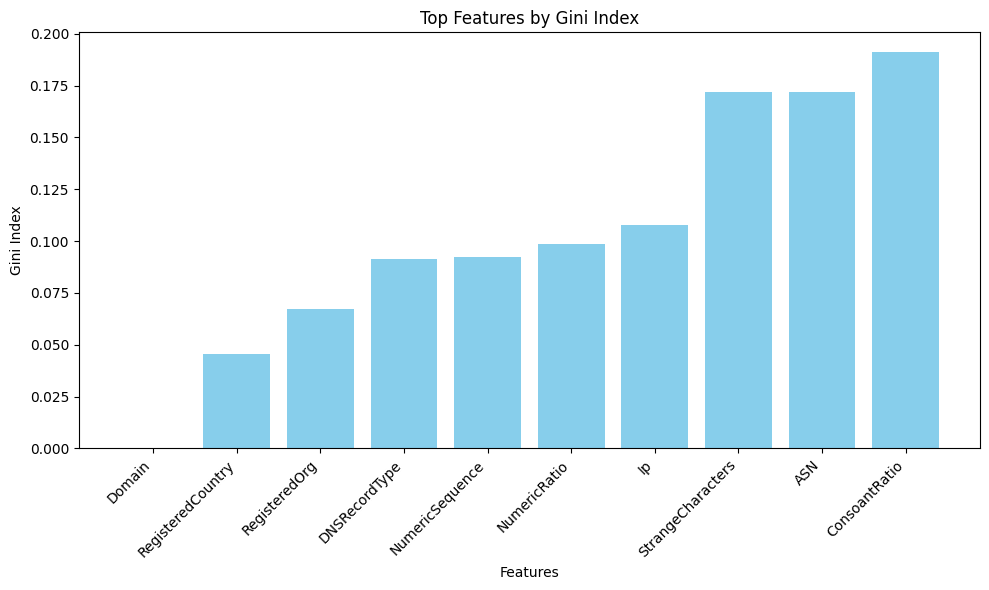

In [ ]:
##### Dans ce cas plus la Gini est proche de Zeros plus plus le features est important cas il est pur (ie bon pour la sepration ) ##


import pandas as pd
import matplotlib.pyplot as plt

# Fonctions pour calculer le Gini Index
def gini_index(data, feature_name, classes):
    """Calculates the Gini index for a specific feature."""
    total_instances = len(data)
    values = data[feature_name].unique()
    gini_index_feature = 0.0

    for value in values:
        subset = data[data[feature_name] == value]
        probability = len(subset) / total_instances
        gini_index_feature += probability * gini(subset, classes)

    return gini_index_feature

def gini(data, classes):
    """Calculates the Gini index for a subset of data."""
    total_instances = len(data)
    gini_index_subset = 1.0

    for c in classes:
        num_instances_in_class = len(data[data['Class'] == c])
        if num_instances_in_class == 0:
            continue
        probability = num_instances_in_class / total_instances
        gini_index_subset -= probability ** 2

    return gini_index_subset

def select_top_features_with_gini_index(data, classes, top_n=10):
    gini_indices = [(feature_name, gini_index(data, feature_name, classes)) for feature_name in data.columns[:-1]]
    top_features = sorted(gini_indices, key=lambda x: x[1])[:top_n]
    return top_features

# data = pd.read_csv("../data/BenignAndMaliciousDataset.csv")
data = df

classes = data['Class'].unique()

# Sélectionner les 10 meilleures caractéristiques avec le Gini Index
top_features_gini_index = select_top_features_with_gini_index(data, classes)

# Afficher les noms et les indices de Gini des 10 meilleures caractéristiques
print("Top 10 Features with Gini Index:")
for feature_name, gini_value in top_features_gini_index:
    print("Feature:", feature_name, ", Gini Index:", gini_value)

# Tracer les 10 meilleures caractéristiques avec le Gini Index
def plot_top_features_gini_index(top_features, feature_names):
    top_feature_names = [feature_name for feature_name, _ in top_features]
    top_feature_gini = [gini_value for _, gini_value in top_features]

    plt.figure(figsize=(10, 6))
    colors = ['skyblue' if gini_value > 0 else 'red' for gini_value in top_feature_gini]  # Couleur spéciale pour les Gini Index de zéro
    plt.bar(top_feature_names, top_feature_gini, color=colors)
    plt.xlabel('Features')
    plt.ylabel('Gini Index')
    plt.title('Top Features by Gini Index')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Tracer les 10 meilleures caractéristiques avec le Gini Index
plot_top_features_gini_index(top_features_gini_index, data.columns[:-1])


Top 10 Features by Pearson Correlation:
Feature: Domain, Pearson Correlation: 0.8605531933081405
Feature: NumericRatio, Pearson Correlation: 0.8298895326759791
Feature: NumericSequence, Pearson Correlation: 0.7763076957558641
Feature: ConsoantRatio, Pearson Correlation: 0.7342523262710107
Feature: StrangeCharacters, Pearson Correlation: 0.6824677627819056
Feature: VowelRatio, Pearson Correlation: 0.6139453769192288
Feature: HasSPFInfo, Pearson Correlation: 0.548015452633043
Feature: TXTDnsResponse, Pearson Correlation: 0.5381813996468965
Feature: CreationDate, Pearson Correlation: 0.4683006573024001
Feature: LastUpdateDate, Pearson Correlation: 0.38147514176017566


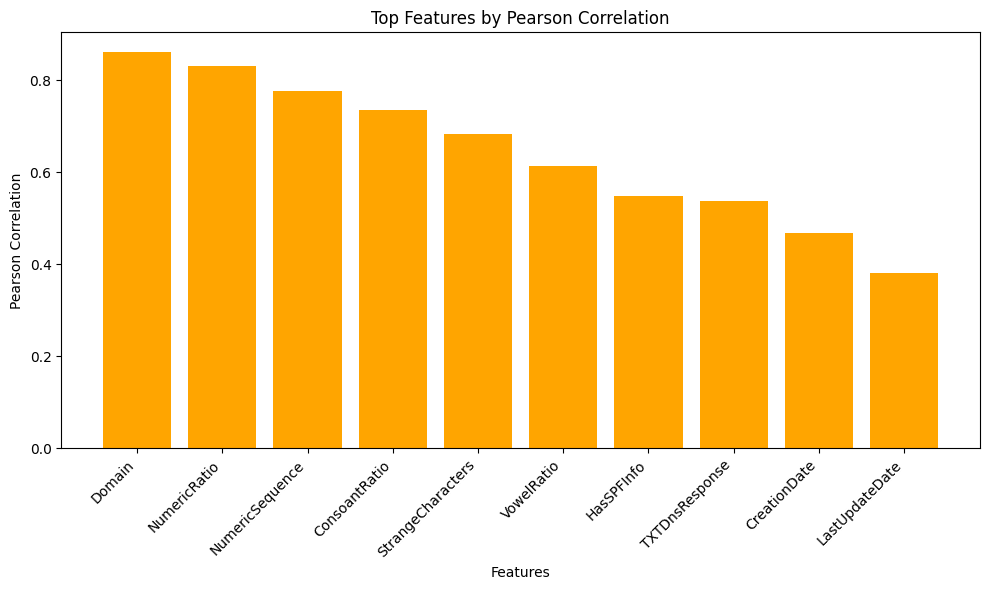

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_pearson_correlation(data):
    # Calculer le coefficient de corrélation de Pearson entre chaque caractéristique et la classe
    pearson_correlation = data.iloc[:, :-1].apply(lambda feature: np.abs(np.corrcoef(pd.to_numeric(feature, errors='coerce'), data.iloc[:, -1])[0, 1]))

    return pearson_correlation

def select_top_features_pearson_correlation(data, top_n=10):
    pearson_correlation = calculate_pearson_correlation(data)
    top_features = pearson_correlation.nlargest(top_n).index.tolist()
    top_features_correlation = pearson_correlation[top_features]

    return top_features, top_features_correlation

def plot_top_features_pearson_correlation(top_features, top_features_correlation):
    plt.figure(figsize=(10, 6))
    colors = ['orange' if correlation > 0 else 'red' for correlation in top_features_correlation]  # Couleur spéciale pour les coefficients de corrélation
    plt.bar(top_features, top_features_correlation, color=colors)
    plt.xlabel('Features')
    plt.ylabel('Pearson Correlation')
    plt.title('Top Features by Pearson Correlation')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# data = pd.read_csv("../data/BenignAndMaliciousDataset.csv")
data = df

# Sélectionner les 10 meilleures caractéristiques avec la corrélation de Pearson
top_features, top_features_correlation = select_top_features_pearson_correlation(data)

# Afficher les noms et les coefficients de corrélation de Pearson des 10 meilleures caractéristiques
print("Top 10 Features by Pearson Correlation:")
for feature, correlation in zip(top_features, top_features_correlation):
    print(f"Feature: {feature}, Pearson Correlation: {correlation}")

# Tracer les 10 meilleures caractéristiques avec la corrélation de Pearson
plot_top_features_pearson_correlation(top_features, top_features_correlation)
